In [1]:
#

In [2]:
# import the required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore") # for ignore warnings

In [3]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

<AxesSubplot:>

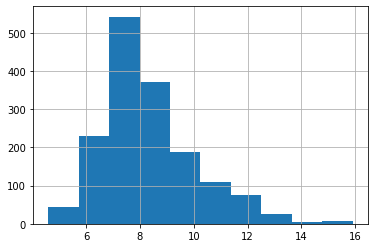

In [5]:

data['fixed acidity'].hist()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Train Test Split 

In [7]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

<AxesSubplot:>

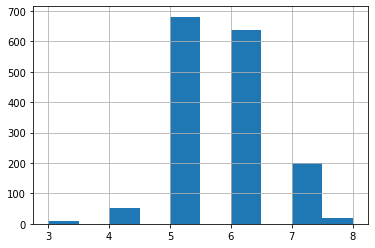

In [8]:
X = data.drop("quality", axis= 1)
y = data['quality']
y.hist()

In [39]:
# data = data.sample(frac=1)   # For shuffle 

from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

In [40]:
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
939,6.2,0.46,0.17,1.6,0.073,7.0,11.0,0.99425,3.61,0.54,11.4
1574,5.6,0.31,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5


In [41]:
y.head(2)

939     5
1574    6
Name: quality, dtype: int64

# Model Selection

In [99]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [100]:
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=0)
# clf.fit(X_train, y_train)

In [101]:
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(random_state=0)
# clf.fit(X_train, y_train)

In [102]:
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors=5)
# clf.fit(X_train, y_train)

In [103]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC

# clf = make_pipeline(StandardScaler(), SVC())
# clf.fit(X_train, y_train)

# from sklearn.svm import SVC
# clf = SVC()
# clf.fit(X_train, y_train)

In [104]:
y_pred = clf.predict(X_test)

# Check Accuracy

In [105]:
from sklearn.metrics import classification_report
print(classification_report (y_test, y_pred ))
classification_report

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.63      0.75      0.69       175
           6       0.49      0.61      0.54       155
           7       0.00      0.00      0.00        51
           8       0.00      0.00      0.00         2

    accuracy                           0.56       400
   macro avg       0.19      0.23      0.21       400
weighted avg       0.47      0.56      0.51       400



<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred )
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score (y_test, y_pred)

0.565

In [98]:
# from sklearn.model_selection import cross_val_score

# cross_val_score(clf, X_test, y_test, cv=10)